In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns; sns.set_theme(font_scale=.75)

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay, classification_report
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import roc_auc_score
from sklearn.preprocessing import label_binarize
from itertools import cycle
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate
from sklearn.metrics import roc_curve, auc


In [2]:
mydata_train = pd.read_csv('mnist_train.csv')
mydata_test = pd.read_csv('mnist_test.csv')

In [3]:
# dataindelning

X_train = mydata_train.iloc[:, 1:].to_numpy()
y_train = mydata_train.iloc[:, 0].to_numpy()

X_test = mydata_test.iloc[:, 1:].to_numpy()
y_test = mydata_test.iloc[:, 0].to_numpy()

# Dela upp träningsdatan i träning och validering
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

In [4]:
# datasetets uppsättning

print(f"Träningsdata: {X_train.shape}")
print(f"Testsdata: {X_test.shape}")

print(f"Unika etiketter i y_train: {set(y_train)}")
print(f"Unika etiketter i y_test: {set(y_test)}")
print(f"Klassfördelning i y_train:\n{pd.Series(y_train).value_counts()}")
print(f"Klassfördelning i y_test:\n{pd.Series(y_test).value_counts()}")


Träningsdata: (48000, 784)
Testsdata: (10000, 784)
Unika etiketter i y_train: {np.int64(0), np.int64(1), np.int64(2), np.int64(3), np.int64(4), np.int64(5), np.int64(6), np.int64(7), np.int64(8), np.int64(9)}
Unika etiketter i y_test: {np.int64(0), np.int64(1), np.int64(2), np.int64(3), np.int64(4), np.int64(5), np.int64(6), np.int64(7), np.int64(8), np.int64(9)}
Klassfördelning i y_train:
1    5420
7    4966
3    4912
2    4784
9    4755
0    4748
6    4741
8    4691
4    4666
5    4317
Name: count, dtype: int64
Klassfördelning i y_test:
1    1135
2    1032
7    1028
3    1010
9    1009
4     982
0     980
8     974
6     958
5     892
Name: count, dtype: int64


In [5]:
print(f"Antal saknade värden i träningsdata: {np.isnan(X_train).sum()}")
print(f"Antal saknade värden i testdata: {np.isnan(X_test).sum()}")


Antal saknade värden i träningsdata: 0
Antal saknade värden i testdata: 0


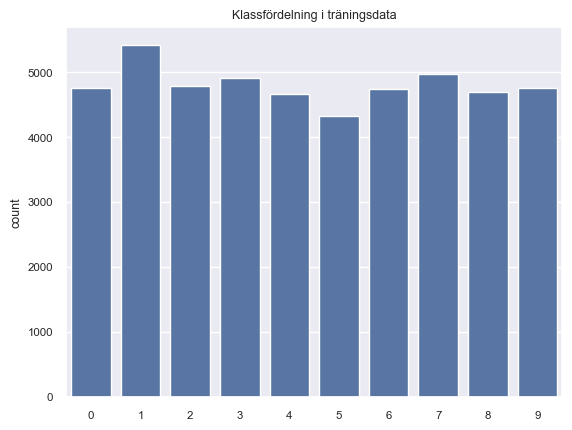

In [6]:

sns.countplot(x=y_train)
plt.title('Klassfördelning i träningsdata')
plt.show()


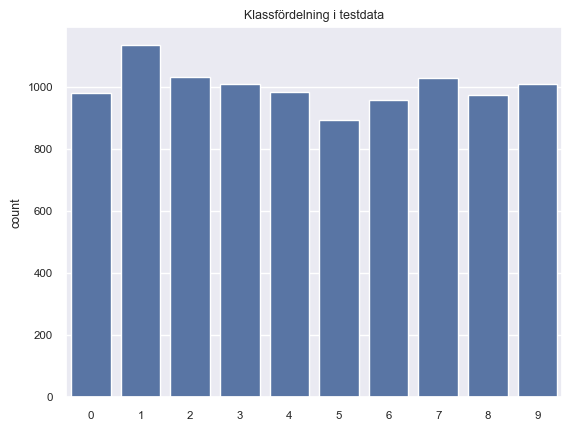

In [7]:
sns.countplot(x=y_test)
plt.title('Klassfördelning i testdata')
plt.show()

In [8]:
#Parameterjustering och random search hparametrar

param_grid = {
    'n_estimators': [50, 100, 150, 200],  # Testa fler estimators för bättre resultat
    'max_depth': [10, 20, 30],       # Lägg till fler alternativ för djup
    'min_samples_split': [5, 10],
    'min_samples_leaf': [2, 4],
    "criterion": ["gini", "entropy"]
}

random_search_rf = RandomizedSearchCV(
    RandomForestClassifier(random_state=42),
    param_grid,
    cv=10,  # 10-fold cross-validation
    verbose=1,
    n_jobs=-1,
    n_iter=10
)

# Kör RandomizedSearchCV på träningsdatan
random_search_rf.fit(X_train, y_train)


Fitting 10 folds for each of 10 candidates, totalling 100 fits


RandomizedSearchCV(cv=10, estimator=RandomForestClassifier(random_state=42),
                   n_jobs=-1,
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_depth': [10, 20, 30],
                                        'min_samples_leaf': [2, 4],
                                        'min_samples_split': [5, 10],
                                        'n_estimators': [50, 100, 150, 200]},
                   verbose=1)

In [9]:
# Se alla resultat av random search
print(random_search_rf.cv_results_['params'])


[{'n_estimators': 50, 'min_samples_split': 5, 'min_samples_leaf': 2, 'max_depth': 10, 'criterion': 'entropy'}, {'n_estimators': 200, 'min_samples_split': 5, 'min_samples_leaf': 2, 'max_depth': 20, 'criterion': 'entropy'}, {'n_estimators': 200, 'min_samples_split': 10, 'min_samples_leaf': 2, 'max_depth': 20, 'criterion': 'gini'}, {'n_estimators': 50, 'min_samples_split': 5, 'min_samples_leaf': 4, 'max_depth': 20, 'criterion': 'entropy'}, {'n_estimators': 150, 'min_samples_split': 10, 'min_samples_leaf': 4, 'max_depth': 20, 'criterion': 'gini'}, {'n_estimators': 50, 'min_samples_split': 5, 'min_samples_leaf': 4, 'max_depth': 10, 'criterion': 'gini'}, {'n_estimators': 200, 'min_samples_split': 10, 'min_samples_leaf': 4, 'max_depth': 20, 'criterion': 'entropy'}, {'n_estimators': 200, 'min_samples_split': 5, 'min_samples_leaf': 2, 'max_depth': 30, 'criterion': 'gini'}, {'n_estimators': 200, 'min_samples_split': 5, 'min_samples_leaf': 2, 'max_depth': 30, 'criterion': 'entropy'}, {'n_estimato

Accuracy: 0.9663

Confusion Matrix:
[[ 968    0    0    0    0    3    4    1    4    0]
 [   0 1122    3    3    0    2    3    1    1    0]
 [   6    0  998    7    3    0    4    8    6    0]
 [   0    0   15  968    0    6    0   10    9    2]
 [   1    0    2    0  952    0    5    0    2   20]
 [   4    0    0   12    4  853    9    3    5    2]
 [   7    3    1    0    4    3  936    0    4    0]
 [   1    3   23    1    1    0    0  982    5   12]
 [   3    0    6    9    3    4    6    4  928   11]
 [   6    6    3   11   13    5    1    4    4  956]]

Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.99      0.98       980
           1       0.99      0.99      0.99      1135
           2       0.95      0.97      0.96      1032
           3       0.96      0.96      0.96      1010
           4       0.97      0.97      0.97       982
           5       0.97      0.96      0.96       892
           6       0.97      0

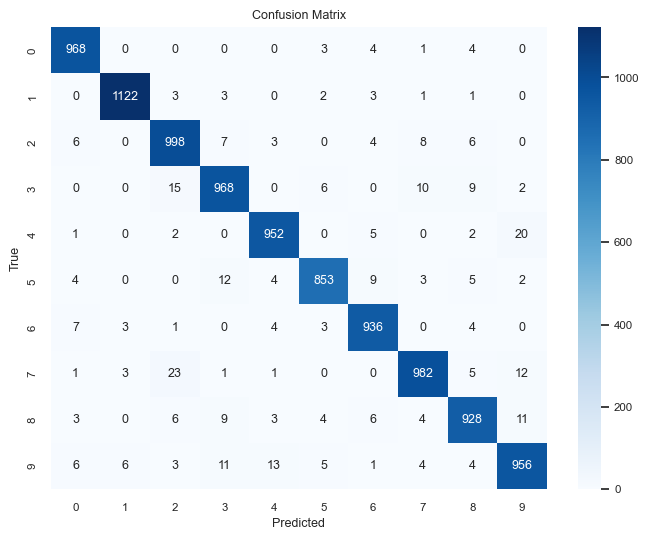

In [10]:
# Prediktera på testdatan
y_pred = random_search_rf.best_estimator_.predict(X_test)

# Utskrift av accuracy
print(f'Accuracy: {accuracy_score(y_test, y_pred):.4f}')

# Utskrift av Confusion Matrix
print('\nConfusion Matrix:')
print(confusion_matrix(y_test, y_pred))

# Utskrift av Classification Report
print('\nClassification Report:')
print(classification_report(y_test, y_pred))

# Visualisera Confusion Matrix
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=True, yticklabels=True)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()


In [11]:
# Hämta första trädet i skogen
first_tree = random_search_rf.best_estimator_.estimators_[0]

# Kontrollera vilket kriterium som används (gini eller entropy)
print(f"Kriterium: {first_tree.criterion}")

# Hämta ut entropi-värden från varje nod i det första trädet
entropy_values = first_tree.tree_.impurity

# Skriv ut de första 10 entropi-värdena
print("Entropi-värden från de första noderna i trädet:")
print(entropy_values[:30])


Kriterium: gini
Entropi-värden från de första noderna i trädet:
[0.89974761 0.8676762  0.6735657  0.52552285 0.71448324 0.50651638
 0.76450323 0.7712434  0.49700962 0.42503284 0.25593232 0.20363546
 0.10725798 0.05110677 0.03108033 0.09209157 0.03332376 0.
 0.5        0.44444444 0.         0.5        0.47637051 0.19753086
 0.44444444 0.         0.32       0.70661157 0.63580247 0.62721893]


In [12]:
entropy_values = first_tree.tree_.impurity
df = pd.DataFrame(entropy_values, columns=['Entropy'])
print(df.head(30))  # Visa de första 30 noderna


     Entropy
0   0.899748
1   0.867676
2   0.673566
3   0.525523
4   0.714483
5   0.506516
6   0.764503
7   0.771243
8   0.497010
9   0.425033
10  0.255932
11  0.203635
12  0.107258
13  0.051107
14  0.031080
15  0.092092
16  0.033324
17  0.000000
18  0.500000
19  0.444444
20  0.000000
21  0.500000
22  0.476371
23  0.197531
24  0.444444
25  0.000000
26  0.320000
27  0.706612
28  0.635802
29  0.627219


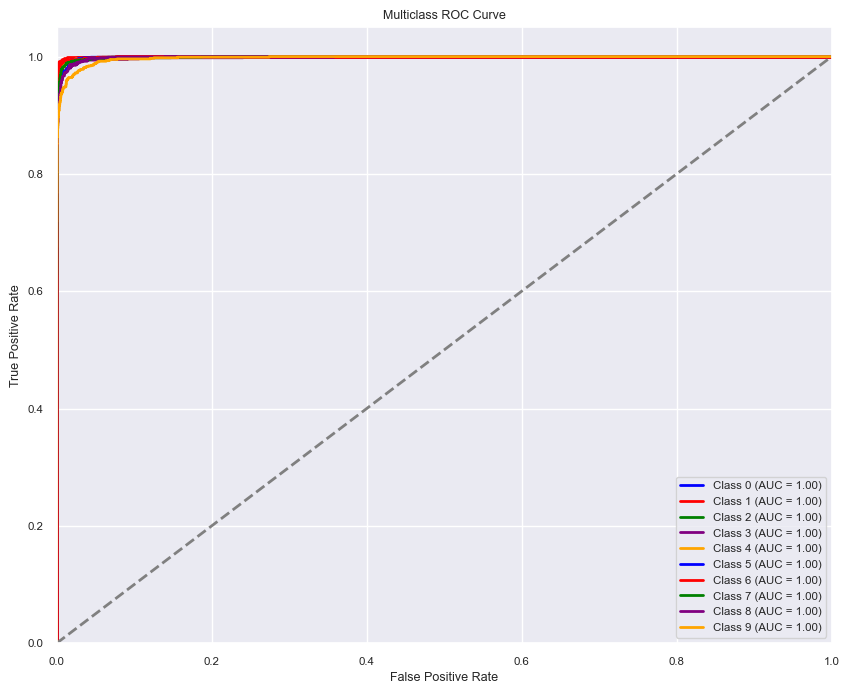

In [13]:
#skapa roc kurva

# Binarisera klasserna för One-vs-Rest
n_classes = len(set(y_test))
y_test_bin = label_binarize(y_test, classes=list(range(n_classes)))
y_score = random_search_rf.best_estimator_.predict_proba(X_test)

colors = cycle(['blue', 'red', 'green', 'purple', 'orange'])

plt.figure(figsize=(10, 8))

for i, color in zip(range(n_classes), colors):
    fpr, tpr, _ = roc_curve(y_test_bin[:, i], y_score[:, i])
    roc_auc = auc(fpr, tpr)
    
    plt.plot(fpr, tpr, color=color, lw=2,
             label=f'Class {i} (AUC = {roc_auc:.2f})')

plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--')

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Multiclass ROC Curve')
plt.legend(loc="lower right")
plt.show()


In [14]:


# Hitta alla felaktiga prediktioner
misclassified = pd.DataFrame({'True': y_test, 'Predicted': y_pred})
misclassified = misclassified[misclassified['True'] != misclassified['Predicted']]

# Räkna ihop de vanligaste felen
summary = misclassified.value_counts().reset_index(name='Count')

# Visa de 10 vanligaste felen
print(summary.head(10))


   True  Predicted  Count
0     7          2     23
1     4          9     20
2     3          2     15
3     9          4     13
4     7          9     12
5     5          3     12
6     8          9     11
7     9          3     11
8     3          7     10
9     8          3      9


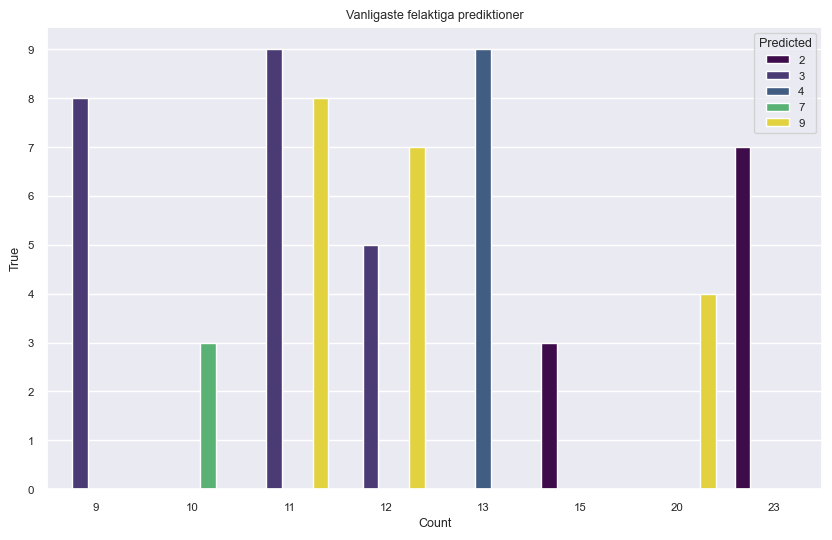

In [15]:

plt.figure(figsize=(10, 6))
sns.barplot(x='Count', y='True', hue='Predicted', data=summary.head(10), palette='viridis')

# Tvinga fram alla siffror (0–9) på y-axeln
plt.yticks(range(10))  

plt.title('Vanligaste felaktiga prediktioner')
plt.show()



In [16]:

pd.DataFrame(random_search_rf.cv_results_).sort_values(by='mean_test_score', ascending=False)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_estimators,param_min_samples_split,param_min_samples_leaf,param_max_depth,param_criterion,params,...,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score
7,167.012289,9.003168,2.112864,0.595459,200,5,2,30,gini,"{'n_estimators': 200, 'min_samples_split': 5, ...",...,0.961667,0.971458,0.964792,0.965208,0.961667,0.961458,0.971458,0.965354,0.003471,1
8,191.757833,21.319690,1.573957,1.361400,200,5,2,30,entropy,"{'n_estimators': 200, 'min_samples_split': 5, ...",...,0.962708,0.970417,0.964375,0.965833,0.963333,0.960417,0.971250,0.965167,0.003158,2
1,200.793689,6.698497,3.298300,1.587935,200,5,2,20,entropy,"{'n_estimators': 200, 'min_samples_split': 5, ...",...,0.960625,0.971250,0.963333,0.964583,0.962292,0.960417,0.970833,0.964750,0.003516,3
2,165.809750,6.313560,2.383624,0.647432,200,10,2,20,gini,"{'n_estimators': 200, 'min_samples_split': 10,...",...,0.960417,0.968333,0.960833,0.963125,0.962292,0.958542,0.968542,0.963042,0.003125,4
9,40.489468,4.383061,0.343323,0.092835,50,5,2,30,gini,"{'n_estimators': 50, 'min_samples_split': 5, '...",...,0.959375,0.970000,0.959167,0.961667,0.960417,0.956667,0.965208,0.962063,0.003537,5
6,196.681411,4.076293,3.153413,2.086815,200,10,4,20,entropy,"{'n_estimators': 200, 'min_samples_split': 10,...",...,0.956042,0.969792,0.960625,0.961667,0.960833,0.955833,0.966875,0.961521,0.004025,6
4,129.607453,4.352834,2.017583,0.588466,150,10,4,20,gini,"{'n_estimators': 150, 'min_samples_split': 10,...",...,0.955000,0.967708,0.960417,0.960833,0.960417,0.955417,0.967292,0.961021,0.003928,7
3,53.510319,3.436037,0.455141,0.154317,50,5,4,20,entropy,"{'n_estimators': 50, 'min_samples_split': 5, '...",...,0.953333,0.967708,0.960625,0.960625,0.957083,0.954375,0.962083,0.959354,0.003856,8
0,63.186040,3.876068,1.082606,0.850979,50,5,2,10,entropy,"{'n_estimators': 50, 'min_samples_split': 5, '...",...,0.939375,0.952708,0.943750,0.946458,0.948542,0.939792,0.948542,0.945396,0.004048,9
5,33.989253,2.055721,0.484140,0.413021,50,5,4,10,gini,"{'n_estimators': 50, 'min_samples_split': 5, '...",...,0.937292,0.947292,0.941875,0.940208,0.942500,0.940417,0.946458,0.942417,0.003203,10
